# Visualizing the gender gap in STEM degrees using matplotlib
There is a lot of debate about the gender gap in STEM fields. Good visualization of the data can help answer some of these complicated questions:
* Are women really represented less than men in STEM fields?
* Has it always been the case?
* Does this hold for every specialization?
* How does it compare to other fields?

The data used comes from the [Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) and be found [here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).
## Reading the data

In [2]:
import pandas as pd
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## Plotting gender distribution in STEM fields over time
### Basic plot
Let's identify the STEM fields and start building an effective visualization. Since the data contains the share of women, we can plot the share of men from the difference with 100%.

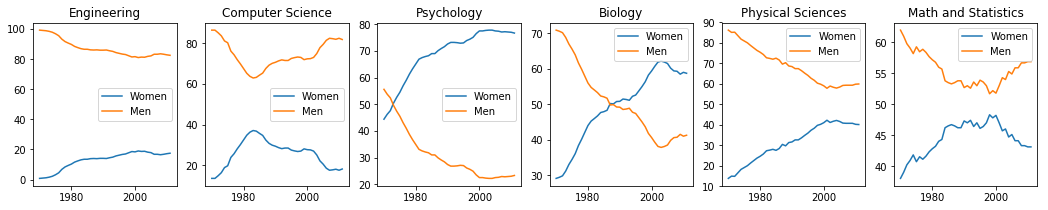

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
fig = plt.figure(figsize=(18, 3))
for sp in range(len(stem_cats)):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], label='Men')
    ax.set_title(stem_cats[sp])
    ax.legend()

### Improving aesthetics
Our plot could be nicer. We can:
* Remove borders
* Make the axis labels more precise
* Remove tickmarks
* Increase the line thickness
* Replace the legend with labels on the first and last plots

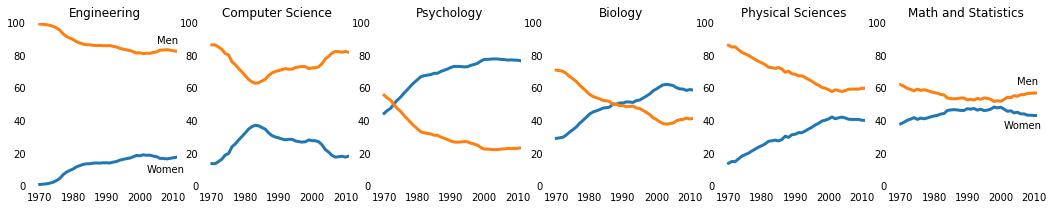

In [30]:
fig = plt.figure(figsize=(18, 3))
for sp in range(len(stem_cats)):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], label='Men', linewidth=3)
    ax.set_title(stem_cats[sp])
    # remove borders
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    # change limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_xticks([1970,1980,1990,2000,2010])
    # remove tick marks
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    # add labels at custom positions
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

## Comparing STEM and other categories
Let's use the same plot to compare STEM fields to the other categories present in the data: Liberal Arts and the rest.

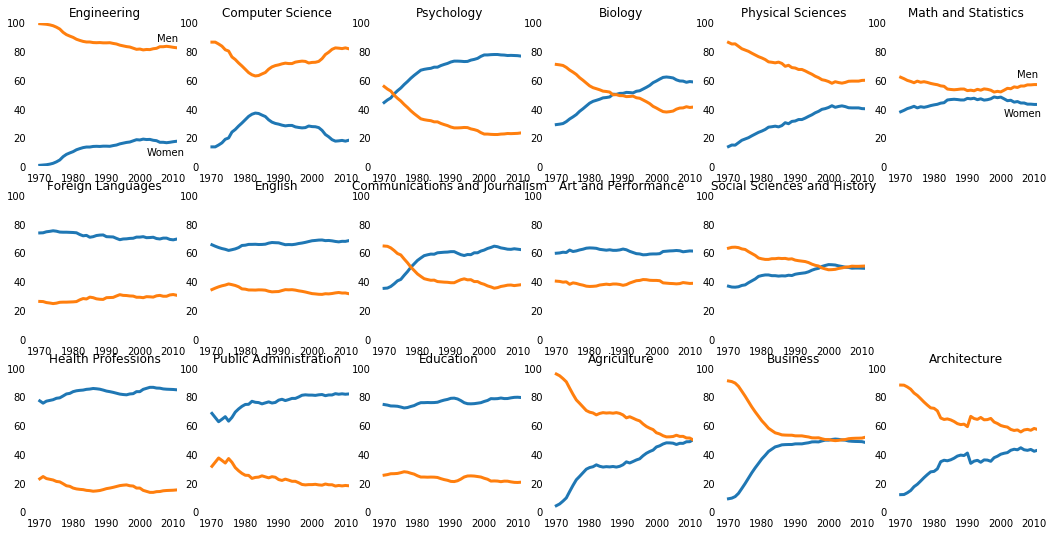

In [33]:
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(18, 9))
for sp in range(len(stem_cats)):
    ax = fig.add_subplot(3,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], label='Men', linewidth=3)
    ax.set_title(stem_cats[sp])
    # remove borders
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    # change limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_xticks([1970,1980,1990,2000,2010])
    # remove tick marks
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    # add labels at custom positions
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        
for sp in range(len(lib_arts_cats)):
    ax = fig.add_subplot(3,6,sp+7)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], label='Men', linewidth=3)
    ax.set_title(lib_arts_cats[sp])
    # remove borders
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    # change limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_xticks([1970,1980,1990,2000,2010])
    # remove tick marks
    ax.tick_params(bottom=False, top=False, left=False, right=False)

for sp in range(len(other_cats)):
    ax = fig.add_subplot(3,6,sp+13)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], label='Men', linewidth=3)
    ax.set_title(other_cats[sp])
    # remove borders
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    # change limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_xticks([1970,1980,1990,2000,2010])
    # remove tick marks
    ax.tick_params(bottom=False, top=False, left=False, right=False)

### Improving aesthetics
More tuning can be done:
* We can add the labels for the other categories at custom points
* Simplify the y axis numbers
* Add a line at 50% showing the parity point
* Remove the year labels except for the bottom row

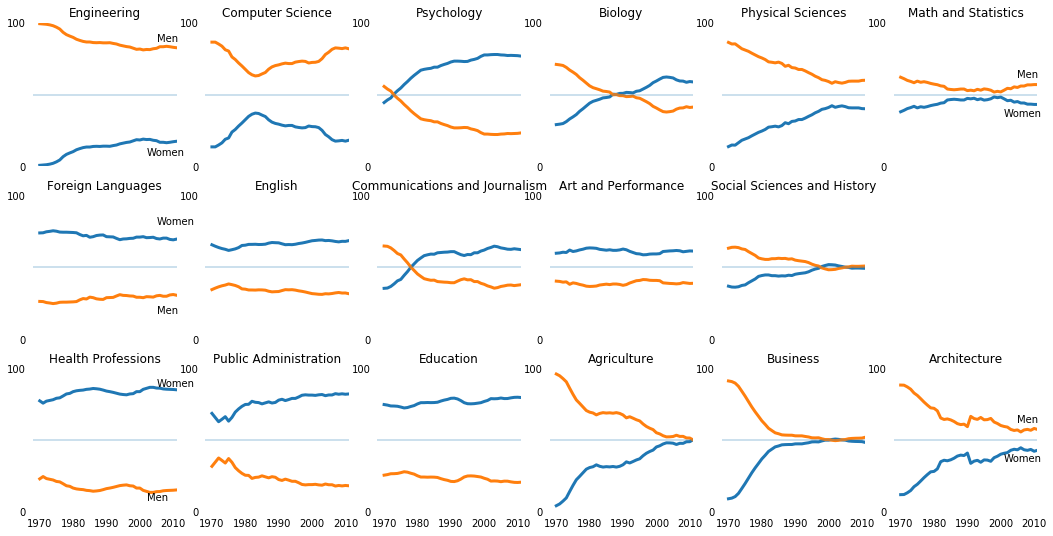

In [34]:
fig = plt.figure(figsize=(18, 9))
for sp in range(len(stem_cats)):
    ax = fig.add_subplot(3,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], label='Men', linewidth=3)
    ax.set_title(stem_cats[sp])
    # remove borders
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    # change limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    # remove tick marks and labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    # add labels at custom positions
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
    # simplify y ticks
    ax.set_yticks([0,100])
    # add horizontal line at 50%
    ax.axhline(50, alpha=0.3)

        
for sp in range(len(lib_arts_cats)):
    ax = fig.add_subplot(3,6,sp+7)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], label='Men', linewidth=3)
    ax.set_title(lib_arts_cats[sp])
    # remove borders
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    # change limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    # remove tick marks and labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    # add labels at custom positions
    if sp == 0:
        ax.text(2005, 80, 'Women')
        ax.text(2005, 18, 'Men')
    # simplify y ticks
    ax.set_yticks([0,100])
    # add horizontal line at 50%
    ax.axhline(50, alpha=0.3)
    
for sp in range(len(other_cats)):
    ax = fig.add_subplot(3,6,sp+13)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], label='Men', linewidth=3)
    ax.set_title(other_cats[sp])
    # remove borders
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    # change limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_xticks([1970,1980,1990,2000,2010])
    # remove tick marks
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    # add labels at custom positions
    if sp == 0:
        ax.text(2005, 87, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
    # simplify y ticks
    ax.set_yticks([0,100])
    # add horizontal line at 50%
    ax.axhline(50, alpha=0.3)

## Answering the questions
* Are women really represented less than men in STEM fields? Does this hold for every specialization?

Women are underepresented in Engineering and Computer Science, but Not in Psychology and Biology. In Physical Sciences and Math, the distribution is almost even

* Has it always been the case?

The trends for Engineering and Physical Sciences are improving. Computer Science and Psychology used to be more even fields. Math and Statistics have been on the same distribution for a long time.

* How does it compare to other fields?

Women are a majority in almost every Liberal Arts and Other fields, with the exception of agriculture and architecture.

## Conclusion
Using the power of pandas and matplotlib, we were able to get an understanding of complex trends accross multiple fields and specializations. The story of gender gap in college degrees is complex, but efficient visualization can come a long way towards getting a better understanding of the topic.